In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\User\\Downloads\\tips (1).csv")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
# Missing Value Check
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Univariate - Non Visual Statistical Analysis

In [7]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [8]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()


In [9]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['float64', 'int64'])


In [10]:
discrete_univariate_analysis(discrete_df)

********** sex **********
count                 244
nunique                 2
unique     [Female, Male]
Name: sex, dtype: object
Value Counts: 
 Male      157
Female     87
Name: sex, dtype: int64

********** smoker **********
count            244
nunique            2
unique     [No, Yes]
Name: smoker, dtype: object
Value Counts: 
 No     151
Yes     93
Name: smoker, dtype: int64

********** day **********
count                        244
nunique                        4
unique     [Sun, Sat, Thur, Fri]
Name: day, dtype: object
Value Counts: 
 Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

********** time **********
count                  244
nunique                  2
unique     [Dinner, Lunch]
Name: time, dtype: object
Value Counts: 
 Dinner    176
Lunch      68
Name: time, dtype: int64



In [11]:
numerical_univariate_analysis(numerical_df)

********** total_bill **********
count     244.000000
min         3.070000
max        50.810000
mean       19.785943
median     17.795000
std         8.902412
skew        1.133213
Name: total_bill, dtype: float64

********** tip **********
count     244.000000
min         1.000000
max        10.000000
mean        2.998279
median      2.900000
std         1.383638
skew        1.465451
Name: tip, dtype: float64

********** size **********
count     244.000000
min         1.000000
max         6.000000
mean        2.569672
median      2.000000
std         0.951100
skew        1.447882
Name: size, dtype: float64



### Bivariate - Non Visual Statistical Analysis

In [12]:
# num vs num

numerical_df.corr()           #directly proportional relationship blw total bill and tip

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [13]:
# cat vs cat

pd.crosstab(discrete_df['sex'], discrete_df['smoker'], normalize=True)

smoker,No,Yes
sex,,
Female,0.221311,0.135246
Male,0.397541,0.245902


In [14]:
pd.crosstab(discrete_df['sex'], discrete_df['smoker'], normalize='index')

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166


In [15]:
# num vs cat

g = df.groupby('sex')

g['total_bill'].agg(['min', 'max', 'mean'])

,min,max,mean
sex,,,
Female,3.07,44.30,18.056897
Male,7.25,50.81,20.744076


## Univariate Plotting For Numerical Columns - Histogram, KDE, CDF and Box Plot


<Axes: xlabel='total_bill', ylabel='Count'>

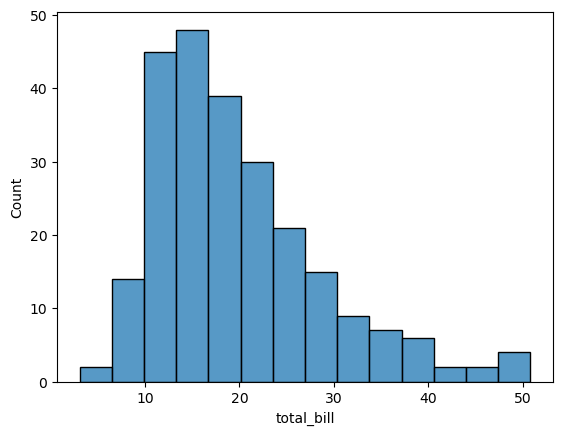

In [16]:
sns.histplot(data=df, x="total_bill")

<Axes: xlabel='total_bill'>

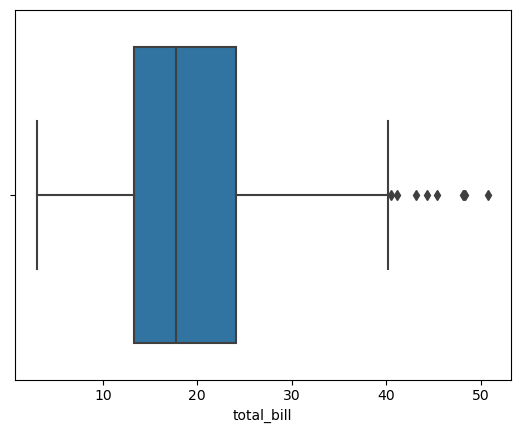

In [17]:
sns.boxplot(data=df, x="total_bill")

<Axes: xlabel='total_bill', ylabel='Density'>

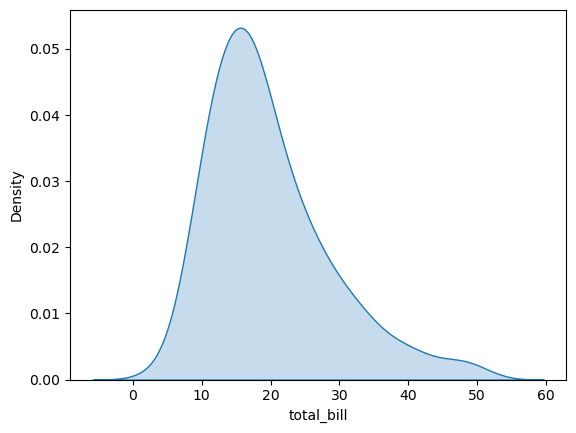

In [18]:
sns.kdeplot(data=df, x="total_bill",fill=True)

<Axes: xlabel='total_bill', ylabel='Proportion'>

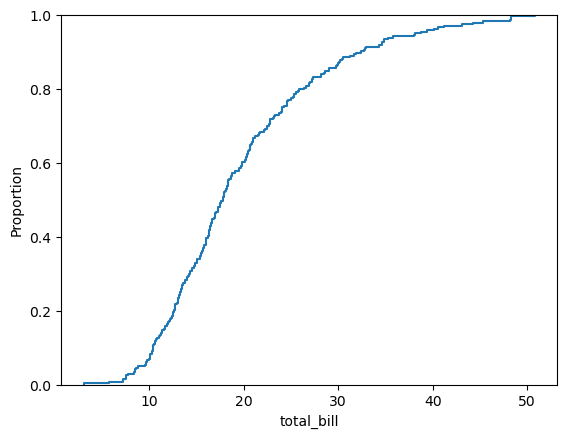

In [19]:
sns.ecdfplot(data=df,x="total_bill")

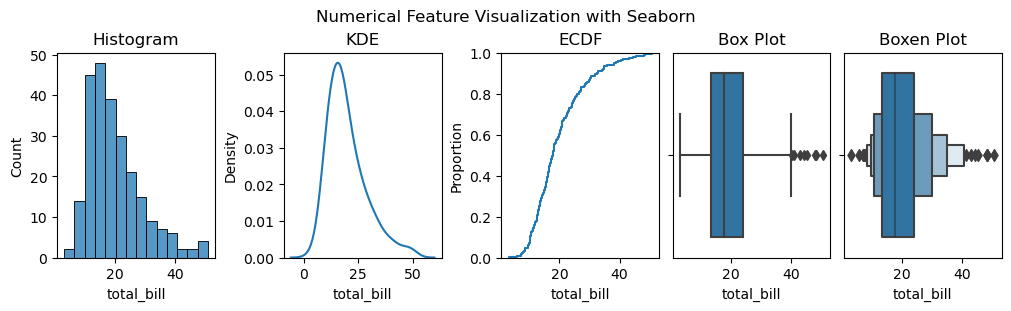

In [20]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='total_bill', ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df, x='total_bill', ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df, x='total_bill', ax=axs[2])

axs[3].set_title("Box Plot")
sns.boxplot(data=df, x='total_bill', ax=axs[3])

axs[4].set_title("Boxen Plot")
sns.boxenplot(data=df, x='total_bill', ax=axs[4])

plt.show()

<Axes: xlabel='day', ylabel='count'>

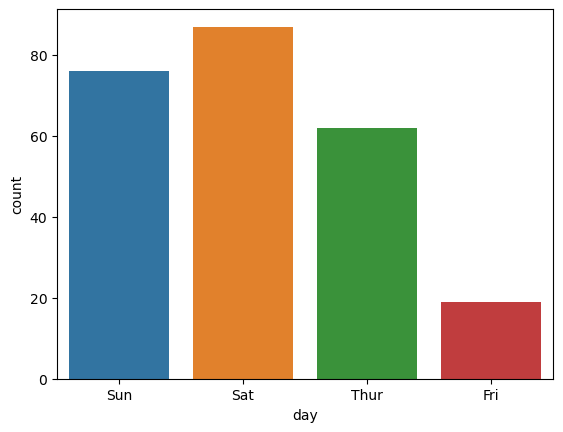

In [21]:
sns.countplot(data=df, x='day')

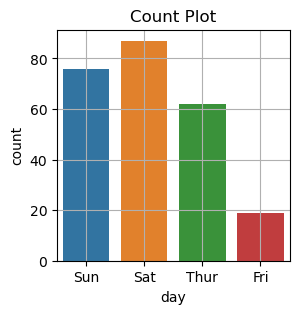

In [22]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='day', ax=ax)

plt.grid(True)

plt.show()


## Bivariate Plotting For Num vs Num Columns - Line Plot, Scatter Plot, Hexbin Plot, Heat Map and Pair Plot

<Axes: xlabel='total_bill', ylabel='tip'>

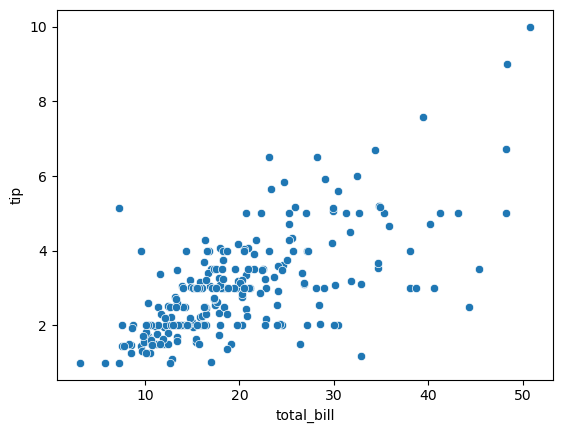

In [23]:
sns.scatterplot(data=df,x='total_bill',y="tip")

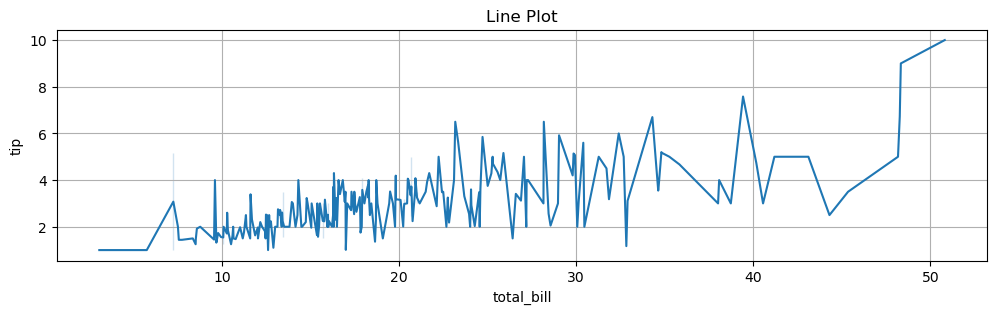

In [24]:
fig, ax = plt.subplots(figsize=(12,3))

ax.set_title("Line Plot")
sns.lineplot(data=df, x='total_bill', y='tip', ax=ax)

plt.grid(True)

plt.show()

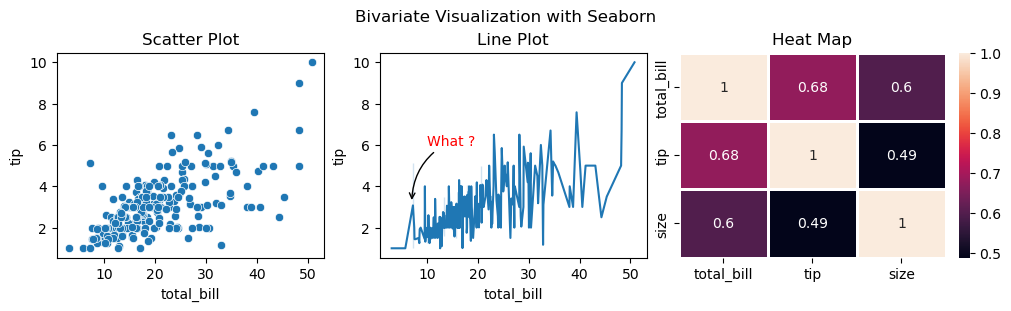

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data=df, x='total_bill', y='tip', ax=axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data=df, x='total_bill', y='tip', ax=axs[1])
axs[1].annotate("What ?", xytext=(10, 6), color="red", 
                xy=(7, 3.2), arrowprops={"arrowstyle":"->", "connectionstyle":"arc3, rad=0.3"})

axs[2].set_title("Heat Map")
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),annot=True, linewidths=0.8, ax=axs[2])

plt.show()

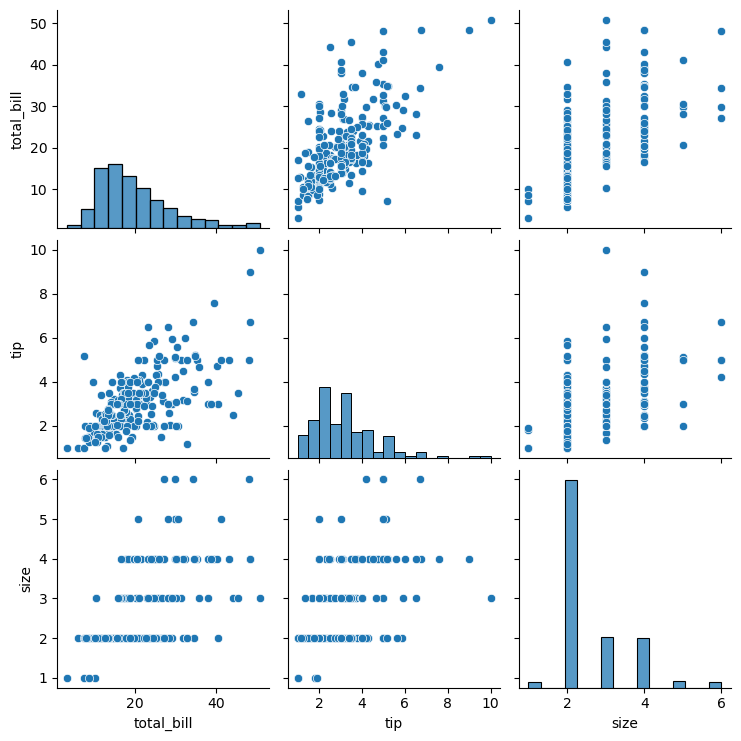

In [26]:
sns.pairplot(df)

### Bivariate Plotting For Num vs Categorical Columns - Box Plot, Violin Plot, Boxen Plot and Histogram Plot

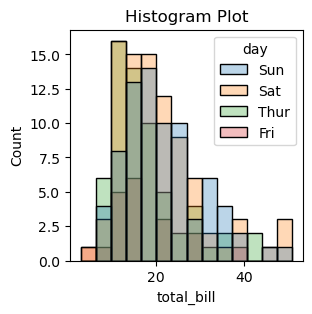

In [27]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Histogram Plot")
sns.histplot(data=df, x='total_bill', hue="day", alpha=0.3, ax=ax)

plt.show()          

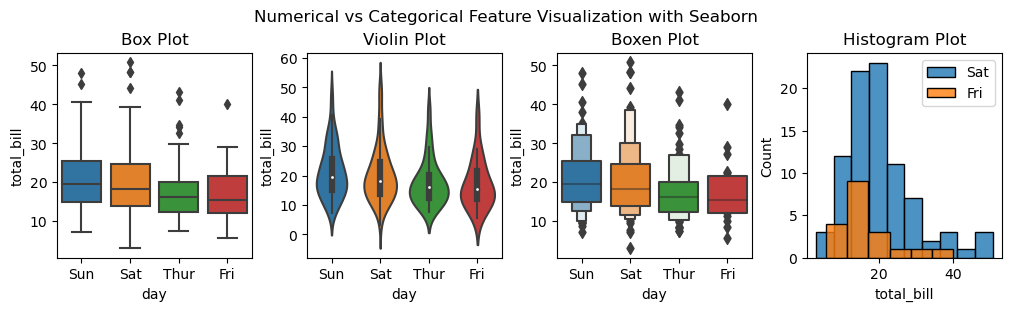

In [28]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Box Plot")
sns.boxplot(data=df, x='day', y='total_bill', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df, x='day', y='total_bill', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df, x='day', y='total_bill', ax=axs[2])

axs[3].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['day']=="Sat"], x='total_bill', alpha=0.8, ax=axs[3], label="Sat")
sns.histplot(data=df.loc[df['day']=="Fri"], x='total_bill', alpha=0.8, ax=axs[3], label="Fri")  #alpha for color 
axs[3].legend()

plt.show()

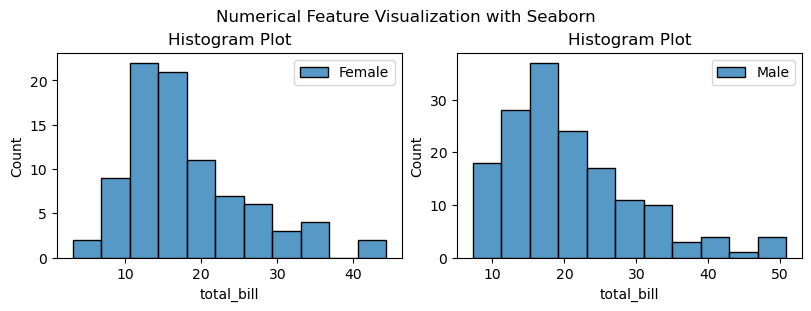

In [29]:
# Implementation without FacetGrid

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Female'], x='total_bill', ax=axs[0], label="Female")
axs[0].legend()

axs[1].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Male'], x='total_bill', ax=axs[1], label="Male")
axs[1].legend()

plt.show()

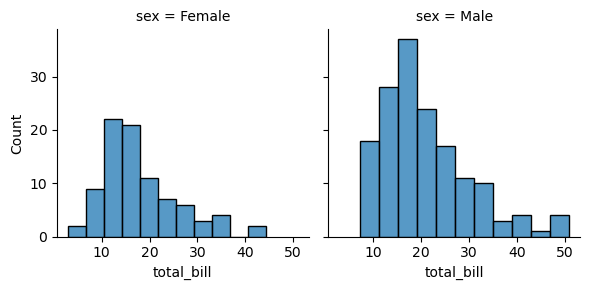

In [30]:
grid = sns.FacetGrid(df, col="sex")
grid.map(sns.histplot, "total_bill")

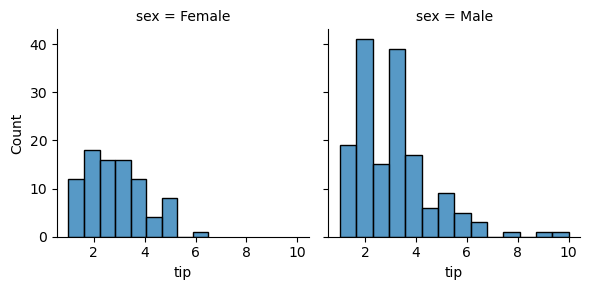

In [31]:
grid = sns.FacetGrid(df, col="sex")
grid.map(sns.histplot, "tip")

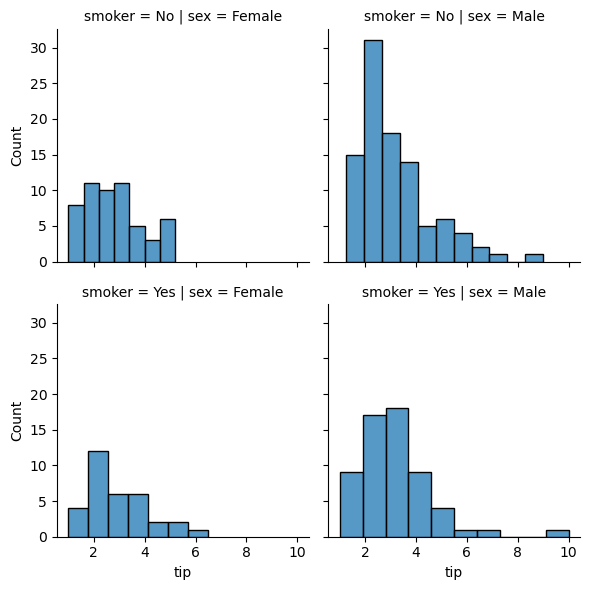

In [32]:
grid = sns.FacetGrid(df, col="sex", row="smoker")
grid.map(sns.histplot, "tip")

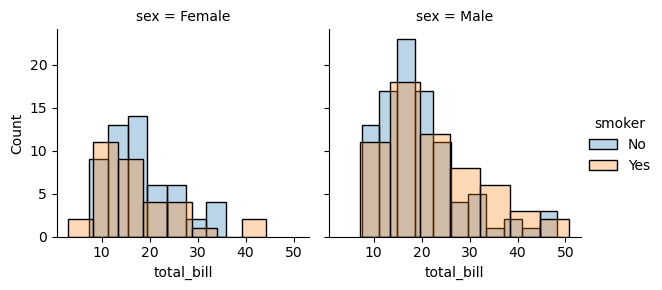

In [33]:
g = sns.FacetGrid(df, col="sex", hue="smoker")
g.map(sns.histplot, "total_bill", alpha=.3)
g.add_legend()


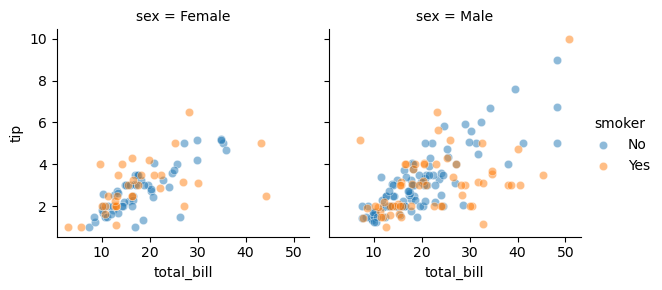

In [34]:
g = sns.FacetGrid(df, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.5)
g.add_legend()

## Bivariate Plotting For Cat vs Categorical Columns - Grouped Count Plot

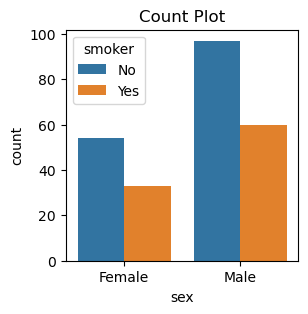

In [35]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='sex', hue='smoker', ax=ax)

plt.show()